# SVM classification
SVM to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated salarly.

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

## Get the Data

In [2]:
df=pd.read_csv('train.csv')

### Check head of the dataframe

In [3]:
df.head()

,Unnamed: 0,Age,EstimatedSalary,Target
0,40,-1.017692,-1.548776,0
1,240,0.415005,2.327385,1
2,196,-0.731153,0.271845,0
3,294,-0.253587,-0.374182,0
4,306,1.274623,1.886912,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head(2)

,Age,EstimatedSalary,Target
0,-1.017692,-1.548776,0
1,0.415005,2.327385,1


## Check for null values


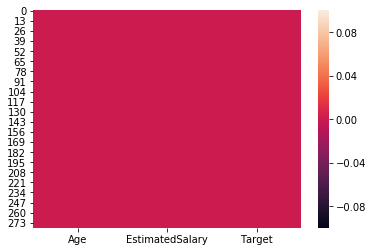

In [6]:
sns.heatmap(df.isnull())

**So in this dataset no null values are present**

## Check correlation

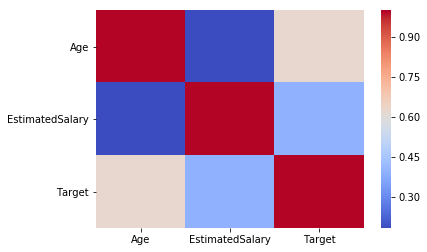

In [7]:
sns.heatmap(df.corr(),cmap='coolwarm')

## Standardize the Variable

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the SVM classifier, than variables that are on a small scale.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()

In [10]:
scaled_array =  sc.fit_transform(df.drop('Target',axis=1))

In [11]:
scaled_array

array([[-1.07327145, -1.56009844],
       [ 0.3974431 ,  2.24115664],
       [-0.77912854,  0.22533955],
       [-0.28889036, -0.40820296],
       [ 1.27987182,  1.80919584],
       [ 0.29939546, -0.00503954],
       [-1.66155727,  0.48451604],
       [-0.97522381, -1.12813764],
       [ 0.10330019,  0.11015001],
       [ 0.98572892,  2.01077755],
       [ 0.3974431 ,  0.25413694],
       [-0.77912854,  0.51331342],
       [ 1.4759671 ,  2.06837232],
       [ 0.88768128, -0.60978467],
       [ 2.16230055, -0.84016377],
       [ 1.08377655,  0.08135262],
       [-0.28889036,  0.02375784],
       [-1.46546199, -1.47370628],
       [ 0.78963364,  1.31964026],
       [ 0.29939546,  0.02375784],
       [ 1.77011001,  0.94527423],
       [ 0.98572892,  0.08135262],
       [-1.85765254,  0.13894739],
       [ 0.98572892, -1.2145298 ],
       [ 0.78963364,  0.71489513],
       [-1.66155727, -0.0914317 ],
       [ 0.20134782, -0.40820296],
       [-1.17131908, -1.12813764],
       [-0.28889036,

In [12]:
x = pd.DataFrame(data=scaled_array,columns=df.columns[:-1])

In [13]:
x.head()

,Age,EstimatedSalary
0,-1.073271,-1.560098
1,0.397443,2.241157
2,-0.779129,0.225340
3,-0.288890,-0.408203
4,1.279872,1.809196


In [14]:
y=df['Target']

In [15]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

# Building a SVM model

Splitting data into a training set and test set.

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [18]:
x_train.shape

(210, 2)

In [19]:
y_train.shape

(210,)

In [20]:
x_test.shape

(70, 2)

In [21]:
y_test.shape

(70,)

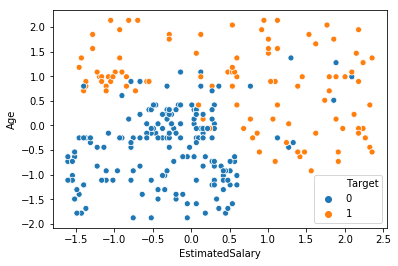

In [22]:
sns.scatterplot(x='EstimatedSalary',y='Age',data=df,hue='Target')

## Model Training and Predictions

In [23]:
from sklearn.svm import SVC 

In [24]:
svm=SVC()

In [25]:
svm.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
ypred=svm.predict(x_test)

In [27]:
ypred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

### Evalution of classification model.
To evaluate classification model use confusion matrix,precision,recall,f1-score.

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
cf=confusion_matrix(y_test,ypred)

In [30]:
cf

array([[40,  7],
       [ 1, 22]], dtype=int64)

In [31]:
accuracy = (47+17)/(47+3+3+17)

In [32]:
accuracy

0.9142857142857143

In [33]:
accuracy = (47+17)/x_test.shape[0]

In [34]:
accuracy

0.9142857142857143

In [35]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.76      0.96      0.85        23

   micro avg       0.89      0.89      0.89        70
   macro avg       0.87      0.90      0.88        70
weighted avg       0.90      0.89      0.89        70

